We will first classify dogs, cats and other animals in this notebook. We will be using a pretrained model for this purpose. Later on we will use transfer learning to classify Bo, the dog of the president. We will also perform some fine-tuning to enhance the performance of the model.

In [1]:
from tensorflow.keras.applications import VGG16
  
# load the VGG16 network *pre-trained* on the ImageNet dataset
model = VGG16(weights="imagenet")

553467096/553467096 [==============================] - 1078s 2us/step


In [2]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_image(image_path):
    image = mpimg.imread(image_path)
    print(image.shape)
    plt.imshow(image)

(1200, 1800, 3)


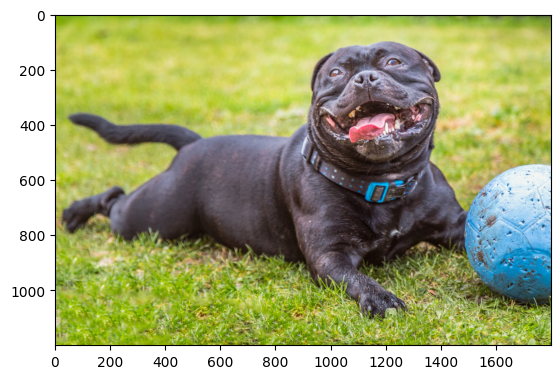

In [5]:
show_image("data/doggy_door_images/happy_dog.jpg")

In [6]:
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.vgg16 import preprocess_input

# preprocessing the images
def load_and_process_image(image_path):
    
    print('Original image shape: ', mpimg.imread(image_path).shape)
    
    image = image_utils.load_img(image_path, target_size=(224, 224))

    image = image_utils.img_to_array(image)

    image = image.reshape(1,224,224,3)

    image = preprocess_input(image)

    print('Processed image shape: ', image.shape)
    return image

In [7]:
processed_image = load_and_process_image("data/doggy_door_images/brown_bear.jpg")

Original image shape:  (2592, 3456, 3)
Processed image shape:  (1, 224, 224, 3)


In [8]:
from tensorflow.keras.applications.vgg16 import decode_predictions

def readable_prediction(image_path):
    
    show_image(image_path)
    
    image = load_and_process_image(image_path)
    
    predictions = model.predict(image)
    
    print('Predicted:', decode_predictions(predictions, top=3))

(1200, 1800, 3)
Original image shape:  (1200, 1800, 3)
Processed image shape:  (1, 224, 224, 3)
35363/35363 [==============================] - 0s 3us/step
Predicted: [[('n02093256', 'Staffordshire_bullterrier', 0.4509502), ('n02110958', 'pug', 0.32263014), ('n02099712', 'Labrador_retriever', 0.09343313)]]


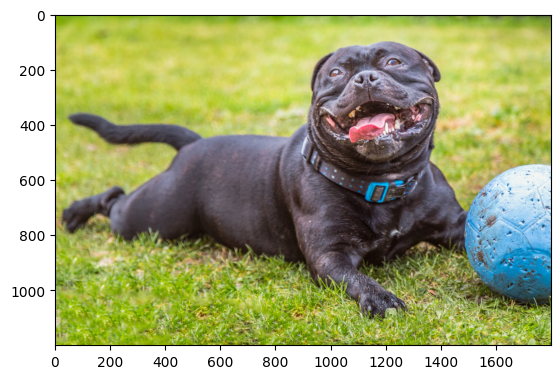

In [9]:
readable_prediction("data/doggy_door_images/happy_dog.jpg")

(2592, 3456, 3)
Original image shape:  (2592, 3456, 3)
Processed image shape:  (1, 224, 224, 3)
1/1 [==============================] - 0s 249ms/step
Predicted: [[('n02132136', 'brown_bear', 0.9853865), ('n02133161', 'American_black_bear', 0.013876298), ('n02410509', 'bison', 0.00026586157)]]


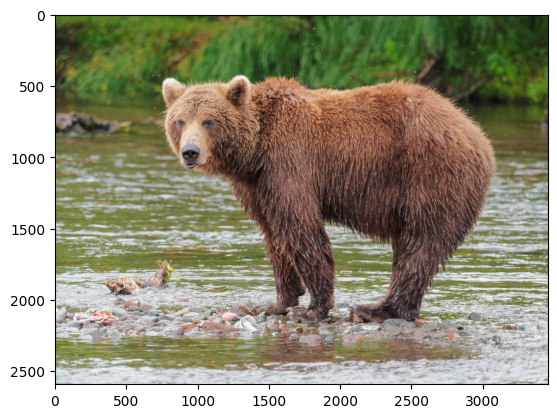

In [10]:
readable_prediction("data/doggy_door_images/brown_bear.jpg")

(1200, 1800, 3)
Original image shape:  (1200, 1800, 3)
Processed image shape:  (1, 224, 224, 3)
1/1 [==============================] - 0s 240ms/step
Predicted: [[('n02123159', 'tiger_cat', 0.7366057), ('n02124075', 'Egyptian_cat', 0.17488629), ('n02123045', 'tabby', 0.04588379)]]


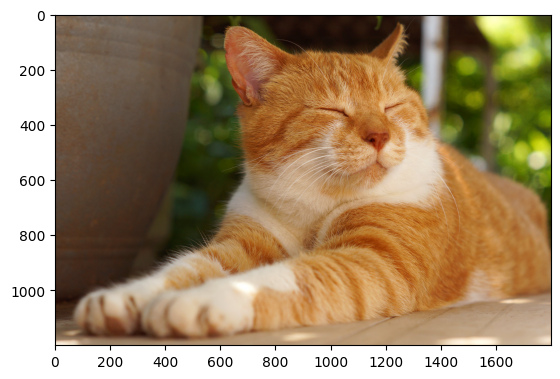

In [11]:
readable_prediction("data/doggy_door_images/sleepy_cat.jpg")

In [12]:
import numpy as np

def doggy_door(image_path):
    show_image(image_path)
    image = load_and_process_image(image_path)
    preds = model.predict(image)
    if 151 <= np.argmax(preds) <= 268:
        print("Doggy come on in!")
    elif 281 <= np.argmax(preds) <= 285:
        print("Kitty stay inside!")
    else:
        print("You're not a dog! Stay outside!")

(2592, 3456, 3)
Original image shape:  (2592, 3456, 3)
Processed image shape:  (1, 224, 224, 3)
1/1 [==============================] - 0s 230ms/step
You're not a dog! Stay outside!


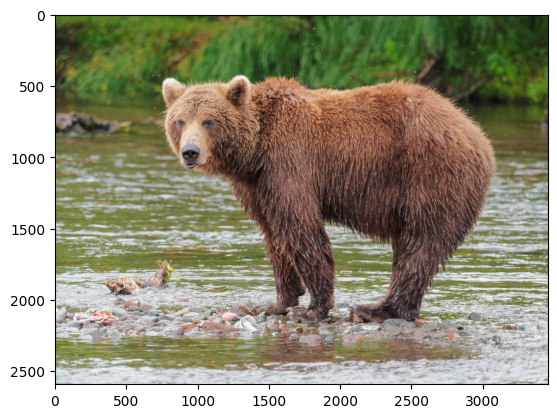

In [13]:
doggy_door("data/doggy_door_images/brown_bear.jpg")

(1200, 1800, 3)
Original image shape:  (1200, 1800, 3)
Processed image shape:  (1, 224, 224, 3)
1/1 [==============================] - 0s 204ms/step
Doggy come on in!


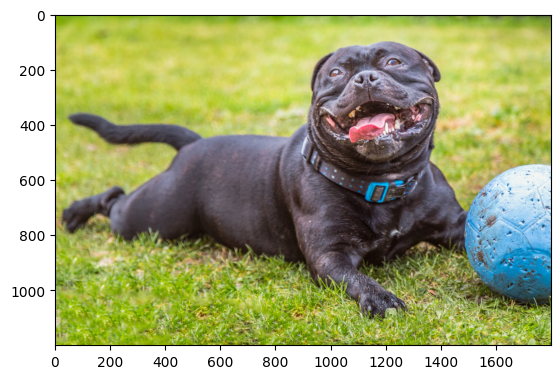

In [14]:
doggy_door("data/doggy_door_images/happy_dog.jpg")

(1200, 1800, 3)
Original image shape:  (1200, 1800, 3)
Processed image shape:  (1, 224, 224, 3)
1/1 [==============================] - 0s 229ms/step
Kitty stay inside!


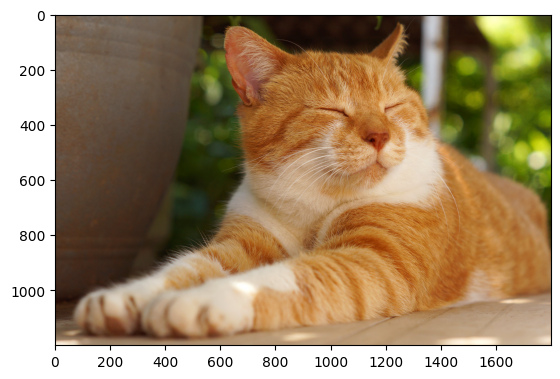

In [25]:
doggy_door("data/doggy_door_images/sleepy_cat.jpg")

We have successfully implemented the classifier using VGG16 !

Now we will use transfer learning to classify Bo, the presidents' dog.

In this model we will not import the output layer as we will add new layers 

In [26]:
from tensorflow import keras

base_model = keras.applications.VGG16(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(224, 224, 3),
    include_top=False)

58889256/58889256 [==============================] - 121s 2us/step


In [27]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [43]:
base_model.trainable = False  # Freezing the model

In [29]:
inputs = keras.Input(shape=(224, 224, 3))

x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)

outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

In [30]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_1   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense (Dense)               (None, 1)                 513       
                                                                 
Total params: 14,715,201
Trainable params: 513
Non-trainable params: 14,714,688
_________________________________________________________________


In [31]:
model.compile(loss=keras.losses.BinaryCrossentropy(from_logits=True), metrics=[keras.metrics.BinaryAccuracy()])

Data Augmentation

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a data generator
datagen_train = ImageDataGenerator(
    samplewise_center=True,  
    rotation_range=10,  
    zoom_range=0.1,  
    width_shift_range=0.1,  
    height_shift_range=0.1,  
    horizontal_flip=True,  
    vertical_flip=False,
)  

# No need to augment validation data
datagen_valid = ImageDataGenerator(samplewise_center=True)

In [33]:
# load and iterate training dataset
train_it = datagen_train.flow_from_directory(
    "data/presidential_doggy_door/train/",
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="binary",
    batch_size=8,
)

# load and iterate validation dataset
valid_it = datagen_valid.flow_from_directory(
    "data/presidential_doggy_door/valid/",
    target_size=(224, 224),
    color_mode="rgb",
    class_mode="binary",
    batch_size=8,
)

Found 136 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [34]:
model.fit(train_it, steps_per_epoch=12, validation_data=valid_it, validation_steps=4, epochs=20)

Epoch 1/20
12/12 [==============================] - 12s 879ms/step - loss: 1.5292 - binary_accuracy: 0.7292 - val_loss: 2.1677 - val_binary_accuracy: 0.6000
Epoch 2/20
12/12 [==============================] - 9s 786ms/step - loss: 0.7189 - binary_accuracy: 0.7812 - val_loss: 1.3126 - val_binary_accuracy: 0.6667
Epoch 3/20
12/12 [==============================] - 10s 817ms/step - loss: 0.4754 - binary_accuracy: 0.8646 - val_loss: 0.7925 - val_binary_accuracy: 0.8000
Epoch 4/20
12/12 [==============================] - 10s 810ms/step - loss: 0.2802 - binary_accuracy: 0.9167 - val_loss: 0.4316 - val_binary_accuracy: 0.8667
Epoch 5/20
12/12 [==============================] - 9s 773ms/step - loss: 0.1221 - binary_accuracy: 0.9375 - val_loss: 0.2577 - val_binary_accuracy: 0.9000
Epoch 6/20
12/12 [==============================] - 10s 811ms/step - loss: 0.0416 - binary_accuracy: 0.9896 - val_loss: 0.2339 - val_binary_accuracy: 0.9333
Epoch 7/20
12/12 [==============================] - 10s 810m

Now we will fine tune the model for a better accuracy. We will unfreeze the entire model and retrain it using a very low learning rate which will ensure that the necessary information is not lost

In [35]:
base_model.trainable = True

model.compile(optimizer=keras.optimizers.RMSprop(learning_rate = .00001),  # Very low learning rate
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])

In [36]:
model.fit(train_it, steps_per_epoch=12, validation_data=valid_it, validation_steps=4, epochs=10)

Epoch 1/10
12/12 [==============================] - 40s 3s/step - loss: 4.7864e-04 - binary_accuracy: 1.0000 - val_loss: 0.0026 - val_binary_accuracy: 1.0000
Epoch 2/10
12/12 [==============================] - 37s 3s/step - loss: 9.3177e-04 - binary_accuracy: 1.0000 - val_loss: 0.0010 - val_binary_accuracy: 1.0000
Epoch 3/10
12/12 [==============================] - 37s 3s/step - loss: 1.8368e-05 - binary_accuracy: 1.0000 - val_loss: 6.4277e-04 - val_binary_accuracy: 1.0000
Epoch 4/10
12/12 [==============================] - 37s 3s/step - loss: 1.6940e-05 - binary_accuracy: 1.0000 - val_loss: 9.4582e-04 - val_binary_accuracy: 1.0000
Epoch 5/10
12/12 [==============================] - 37s 3s/step - loss: 5.4413e-05 - binary_accuracy: 1.0000 - val_loss: 7.6781e-04 - val_binary_accuracy: 1.0000
Epoch 6/10
12/12 [==============================] - 38s 3s/step - loss: 0.0055 - binary_accuracy: 1.0000 - val_loss: 5.6801e-04 - val_binary_accuracy: 1.0000
Epoch 7/10
12/12 [======================

In [37]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.imagenet_utils import preprocess_input

def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image)

def make_predictions(image_path):
    show_image(image_path)
    image = image_utils.load_img(image_path, target_size=(224, 224))
    image = image_utils.img_to_array(image)
    image = image.reshape(1,224,224,3)
    image = preprocess_input(image)
    preds = model.predict(image)
    return preds

1/1 [==============================] - 0s 344ms/step


array([[-10.853145]], dtype=float32)

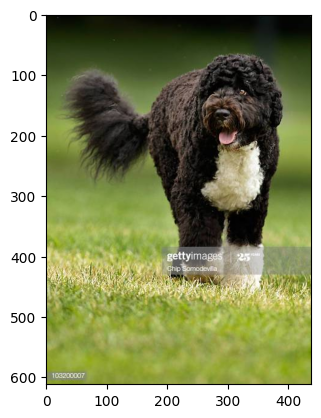

In [38]:
make_predictions('data/presidential_doggy_door/valid/bo/bo_20.jpg')

1/1 [==============================] - 0s 168ms/step


array([[42.38956]], dtype=float32)

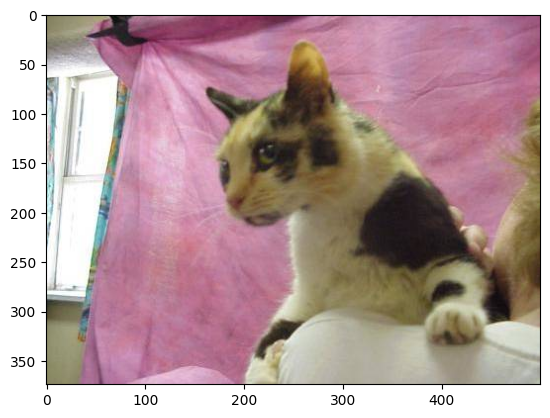

In [39]:
make_predictions('data/presidential_doggy_door/valid/not_bo/121.jpg')

In [40]:
# SOLUTION
def presidential_doggy_door(image_path):
    preds = make_predictions(image_path)
    if preds[0] < 0:
        print("It's Bo! Let him in!")
    else:
        print("That's not Bo! Stay out!")

1/1 [==============================] - 0s 248ms/step
That's not Bo! Stay out!


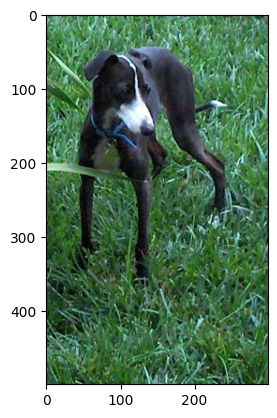

In [41]:
presidential_doggy_door('data/presidential_doggy_door/valid/not_bo/131.jpg')

1/1 [==============================] - 0s 176ms/step
It's Bo! Let him in!


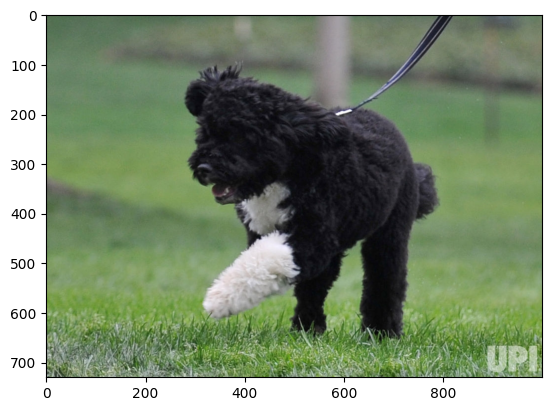

In [42]:
presidential_doggy_door('data/presidential_doggy_door/valid/bo/bo_29.jpg')